#  Hotel booking prediction #
By Alfonso Cervantes Barragán  
Data Scientist

## Introduction ##

In the competitive hotel industry, offering flexible cancellation policies can be a double-edged
sword. While allowing clients to cancel bookings up until the last minute can attract more
customers, it also leads to a high cancellation rate.

## Business problem ##
How can a hotel maximize its revenue by optimally managing overbookings, considering the
risks and costs involved?


## The Challenge ## 
You are tasked with developing a comprehensive strategy to determine the ideal overbooking
rate for a hotel that allows cancellations until the last minute. This involves creating predictive
models to balance the benefit of filling as many rooms as possible against the risk of having to
compensate guests when overbooking leads to more guests than available rooms.

## Assumptions ##
Seasonality effects on booking rates are not considered.  
The demand is consistently strong, allowing for 100% booking of available rooms.

## Expected products ##

Compile a report detailing your models, methodologies, and findings. 
Explain the logic behind your models and how they contribute to maximizing revenue.

**API Development:**
Implement an endpoint /overbookingData that accepts a date parameter and returns:
1. Expected cancellation rate
2. Actual cancellation rate
3. Actual Revenue
4. Expected Revenue

**Dataset Overview:**

● Revenue per Room: $300 per night

● Severance Cost: $1,000 per night (if no room is available to fulfill a booking)    

● Hotel Capacity: 50 rooms  

## Definitions ##

**What is the cancellation rate?**: A cancelation rate is the percentage of canceled booking in relation to 
    the total number of bookings.

**What is the overbooking rate?**: The overbooking rate refers to the practice of accepting more reservations than the available capacity, taking into account the expected no-show rate.

One simple definition for the overbooking rate is to set it equal to the cancellation rate. This definition implies that the rate at which reservations are canceled is used as a proxy for determining the overbooking rate. This could mean that a business or service provider may intentionally accept more reservations than their capacity, with the expectation that a certain percentage of customers will cancel. 

By equating the overbooking rate with the cancellation rate, the business may aim to achieve a balance between maximizing capacity utilization and minimizing revenue loss due to cancellations.

**Definition of reveneu**  

Assuming that the demand is stronger as the capacity of the accomodation, the Reveneu (R) can be determined as:
    
    Revenue = (Revenue per Room)*Capacity - Severance Cost*(Excess demand over capacity)

## PROPOSED SOLUTION ##

The solution proposed here is to define an overbooking rate for each customer type. This strategy involves analyzing customer behavior, optimizing revenue through tailored overbooking strategies, and minimizing losses by recognizing cancellation tendencies. The solution is defined as a data-driven overbooking model involves using machine learning techniques to predict the "no-show" probability (cancellation rate) of each customer. This personal information is then utilized to determine the best overbooking limits, with the goal of maximizing expected revenue. 

One simple definition for the overbooking rate is to set it equal to the cancellation rate. This definition implies for the solution proposed that the rate at which reservations are canceled by a customer type is used as a proxy for determining the overbooking rate for this customer type. This could mean that a business or service provider may intentionally accept more reservations for customer type with highter cancellation rates or put them intentionally in waiting lists despite of beeing available rooms assuming certain cancellation pattern. 

In conclusion,  different customer types may require distinct overbooking strategies. By identifying these customer types, hotels can develop optimal overbooking strategies that balance revenue maximization with customer satisfaction, ensuring that overbooking practices align with the needs and behaviors of specific customer segments.

This solution is based on two Classification problems:
1. Identifying type of customer: How characteristics extracted from the booking information of a customer can be asigned to a customer type?
2. Identifying the probability that the customer type will be cancelling the booking or not.
3. Calculate overbooking limit (excess demand over capacity) for each customer type. 
4. Calculate Reveneu as the sum of the reveneu per customer type.


According to the problem conditions, price changes over time will not be considered

**Bibliography:**
    
Varini, Kate. (2011). The Impact of Overbooking on Customer Loyalty: Can it be Positive?

Overbooking Strategy: Right on Target or a Shot in the (Hotel’s) Foot?
url: https://asksuite.com/blog/overbooking-strategy-good-practices/

¿Cómo influye el overbooking en los ingresos de los hoteles?
url: https://www.yieldplanet.com/es/how-does-overbooking-influence-hotel-revenue/

## LIBRARIES ##

In [1]:
### Data Analysis and Manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set() ## this is for styling
### Modeling with K-Means and PCA
from sklearn.cluster import KMeans

#Modeling Random Forest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Test and evaluation of results
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve

from datetime import datetime
import calendar



**Global variables**

In [2]:
monthlist = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

**Functions**

In [3]:
#def getbarplotdf(df3,var,total_requestry):
#    dfx = df3[var].value_counts()/total_requestry
#    dfx = dfx.reset_index()
#    dfx = dfx.sort_values(by=var, ascending=False)
#    dfx.set_index(var,inplace=True)
#    return dfx

def getbarplotdf(df3,var,total_requestry):
    
    if df3.shape[0] > 0:
        dfx = df3[var].value_counts()/total_requestry
    else:
        dfx = df3
    
    dfx = dfx.sort_values(ascending=False).reset_index()
    dfx.set_index("index",inplace=True)
    return dfx

#Example
#df3 = df2[df2.is_canceled == 0]
#dfx = getbarplotdf(df3,"market_segment")
#plt.bar(dfx.index,dfx["count"],label="not canceled")

###########################################
def getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False,showplot = True):
    
    #cum  = show cummulative histogram (0=no, 1=yes)
    #rot (integer) : angle of rotation of xlabels
    #asc (boolean) : sort order for cummulative histogram
    #showplot  (boolean) : True or False
    
     
    plt.figure(figsize=(width,height))
    plt.title(title)
    dfx2 = df2[var].value_counts(normalize=True).reset_index()
    dfx2 = dfx2.sort_values(by=var, ascending=asc)
    
    dfx2.set_index("index",inplace=True)
    #print(dfx2)
    if (cum == 1) & (showplot == True) :
        cdf = np.cumsum(dfx2[var])
        plt.plot(dfx2.index, cdf, label='Cumulative Histogram', color='b',linestyle="--",marker="o")
    

    listdfx = list(df2[var].unique())
    dfx_ = pd.DataFrame(listdfx,columns=[var])
    dfx_.set_index(var,inplace=True)
    
    # the "normalize=True" indicates the corresponding percentage.
    df3 = df2[df2.is_canceled == 0]
    print("number of registry not canceled",df3.shape)
    dfx = getbarplotdf(df3,var,df2.shape[0])
    dfx.columns=[var+"_not_canceled"]
    print("number of registries not canceled ", df3.shape)
    print(dfx)
    
    # the "normalize=True" indicates the corresponding percentage.
    df4 = df2[df2.is_canceled == 1]
    dfx1 = getbarplotdf(df4,var,df2.shape[0])
    dfx1.columns = [var+"_canceled"]
    print("number of registries canceled",df4.shape)
    print(dfx1)
    
    dfx4 = dfx_.merge(dfx, how="left", left_index=True,right_index=True).fillna(0.0).merge(dfx1,how="left",left_index=True,right_index=True)
    dfx4 = dfx4.fillna(0.0)
    
    if showplot == True:
        plt.bar(dfx4.index,dfx4[var+"_not_canceled"],label="not canceled")
        plt.bar(dfx4.index,dfx4[var+"_canceled"],label="canceled",bottom = dfx4[var+"_not_canceled"])
        plt.xticks(rotation=rot)
        plt.ylabel("Percentage (%)")
        plt.xlabel(xlabel)
        plt.legend()
        plt.show()
    
    #dfx = not canceled registries, dfx1 = canceled registries, dfx2 = total registries
    return dfx4,dfx2

#Example
#title = "Booking frequency per month"
#dfx,dfx1,dfx2 =getstackedplot(df2,"month_number","time (month)",title,12,3,0,0,False,True)
########################################merging proportion dataframes to get percentage of canceled and not canceled bookings per month
def getcancelationrate(dfx,var):
    dfx["total"] = dfx[var + "_not_canceled"] + dfx[var+"_canceled"]
    dfx["per_"+var+"_not_canceled"] = dfx[var + "_not_canceled"]/dfx.total
    dfx["per_"+var+"_canceled"] = dfx[var + "_canceled"]/dfx.total
    return dfx[["per_"+var+"_not_canceled","per_"+var+"_canceled"]]

######################################### roc curve ########################3
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    
#########################################
def obtain_date():
    while True:
        date_str = input("Please enter a date in the format DD/MM/YYYY: ")
        try:
            date = datetime.strptime(date_str, "%d/%m/%Y")
            return date
        except ValueError:
            print("Invalid date format. Please try again.")

## Data set ## 

The dataset consists of various attributes related to hotel bookings, which shed light on different aspects of the bookings, such as cancellation rates, lead time, length of stay, guest demographics, previous booking history, and special requests.

Description of the data set:

1. is_canceled (integer): categorical variable (1 = booking canceled, 0 = booking not canceled)
2. lead_time (integer): Lead time (assumed days) in hotels refers to the period between a guest confirming a reservation and their actual arrival at the hotel 
3. arrival_date_month (string): name of the month
4. arrival_date_week_number (integer)
5. arrival_date_day_of_month (integer)
6. stays_in_weekend_nights  (integer): Number of days at the weekend booked 
7. stays_in_week_nights  (integer)
8. adults (integer) : number of adults
9. children  (integer) : number of children
10. babies  (integer)
11. meal (string) : type of meals
12. country (string) : indicates the country of the customer
13. market_segment (string): label for the market segment type
14. is_repeated_guest (integer): 
15. previous_cancellations (integer)  : number of bookings canceled by the customer
16. previous_bookings_not_canceled (integer) :
17. booking_changes (integer)
18. deposit_type (object) : (No deposit, non refund, refundable)
19. company  (float) : unkwon
20. days_in_waiting_list (int)
21. customer_type (string) : label for the customer type
22. required_car_parking_spaces  (integer)
23. total_of_special_requests  (integer)
24. reservation_status  (string)
25. name( string ) : name of the person who make the booking.
26. email(string)  : email of the responsible person for the booking.
27. phone.number(string) : phone number of the responsible person.
28. credit_card(string)  : credit card number of the responsible person.



In [4]:
df = pd.read_csv("dataset.csv")
print("Number of registries ", df.shape[0])
print("Number of variables ", df.shape[1])
#df.head()
#df.to_excel("probe.xlsx")

Number of registries  12605
Number of variables  28


**Expected limitations of the dataset:**

While the provided dataset offers valuable insights, it's essential to acknowledge its limitations to ensure a comprehensive understanding of the findings. Some limitations to consider could include:


1. Sample Size: The dataset includes a specific number of hotel bookings, which may not represent the entire population of hotel bookings worldwide. The conclusions drawn from this dataset should be considered within this context.

2. Data Collection: The dataset may have been collected from a specific source or sources, which could introduce biases or limitations in terms of the types of hotels, locations, or demographics represented.

3. Generalizability: The dataset may not capture the full diversity of hotel bookings worldwide. The conclusions drawn from this dataset may not be applicable to all types of hotels, regions, or booking scenarios.

4. Missing Data: The dataset may contain missing values or incomplete information for certain attributes. This could impact the accuracy of the conclusions drawn, especially when analyzing specific attributes with missing data.

5. Contextual Factors: The dataset does not provide information about external factors that could influence the patterns observed. Factors such as economic conditions, seasonal variations, or specific events could affect the booking behavior and outcomes.

6. Missing Data: The dataset may contain missing values or incomplete information for certain attributes, which could impact the accuracy of the conclusions drawn.

**Data type**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12605 entries, 0 to 12604
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     12605 non-null  int64  
 1   lead_time                       12605 non-null  int64  
 2   arrival_date_month              12605 non-null  object 
 3   arrival_date_week_number        12605 non-null  int64  
 4   arrival_date_day_of_month       12605 non-null  int64  
 5   stays_in_weekend_nights         12605 non-null  int64  
 6   stays_in_week_nights            12605 non-null  int64  
 7   adults                          12605 non-null  int64  
 8   children                        12605 non-null  int64  
 9   babies                          12605 non-null  int64  
 10  meal                            12605 non-null  object 
 11  country                         12604 non-null  object 
 12  market_segment                  

*Classification of the variables*:  


**Nominal variable**: is a type of categorical variable that has two or more categories, 
but there is no intrinsic ordering or ranking among the categories. In data science, it is important to identify nominal variables as they help us understand the data and choose appropriate analysis techniques. Nominal variables are categorical in nature, and identifying them allows for proper classification, analysis, visualization, and preprocessing of the data. 

According to the definition of the variables beforementioned, the columns "is_canceled, meal, country, market_segment, deposit_type, customer_type, reservation_status" and "is_repeated_guest" are nominal variables. 


**Ordinal variables**: are categorical variables with a clear ordering or ranking among their categories. Identifying ordinal variables helps in choosing appropriate analysis techniques, such as using frequency distribution tables, measures of central tendency (e.g., mode), and non-parametric statistical tests. 

the arrival_date_month, the arrival_date_week_number and the arrival_date_day_of_month can be classified as an ordinal variable
because they can be ordered sequentially. Although it has been subject to interpretation and context and some argue about this classification. 

**Temporal variable**: are variables that represent time-related information or characteristics in a dataset. These variables capture aspects such as the progression of time, timestamps, or temporal relationships between events.

In that sense, the arrival_date_month, the arrival_date_week_number and the arrival_date_day_of_month can be considered temporal variables. 

**Numeric variables**: represent quantities or measurements.

The lead_time, stay_in_weekend_nights, stay_in_week_nights,adult, children, babies,previous_cancellations, 
previous_bookings_not_canceled, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests are
discrete numerical variables used for counting. 

### Missing values (NaN = not a number) ###

In [26]:
((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))[0:10]

company                           0.957715
country                           0.000079
is_canceled                       0.000000
previous_bookings_not_canceled    0.000000
phone.number                      0.000000
email                             0.000000
name                              0.000000
reservation_status                0.000000
total_of_special_requests         0.000000
required_car_parking_spaces       0.000000
dtype: float64

The variable "company" is numeric and presents 95$\%$ of missing values. The column will be dropped. 

On the other side, the variable "country" is a nominal variable. When it comes to imputing missing values in nominal variables, there are several approaches that can be considered: mode imputation, multiple imputation and conditional imputation. Because the percentage of missing values only corresponds to one row, the Mode imputation seems to be  acceptable approach, which involves replacing  the missing values with the most frequent category or mode of the variable. This method assumes that the most common category is representative of the missing values. According to the database, the mode of the column "country" is "PRT", related to "Portugal". 

Replacing missing values in column "country" and dropping column "company"

In [6]:
df1 = df.copy()

#replace missing values in column "country" with mode of column.
print("The mode of the column 'country' is ", df1["country"].mode()[0])
df1["country"] = df1["country"].fillna(df1["country"].mode()[0])

#drop column "company"
df1.drop("company", inplace=True, axis=1)

The mode of the column 'country' is  PRT


**General Statistics**  

The describe() method in pandas is used to compute descriptive statistics for a DataFrame. It provides a summary of the central tendency, dispersion, and shape of the distribution of the data. 

In [7]:
df1.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000,12605.000000
mean,0.423879,110.545577,26.875288,15.706545,0.811265,2.198651,1.856089,0.092344,0.004443,0.022610,0.077747,0.113447,0.190797,3.299802,0.023721,0.531694
std,0.494191,110.156084,13.351520,8.717250,0.895526,1.489479,0.513306,0.374161,0.067690,0.148663,0.446771,1.526653,0.626439,21.633517,0.152704,0.770086
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,76.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,163.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,629.000000,53.000000,31.000000,10.000000,24.000000,4.000000,3.000000,2.000000,1.000000,21.000000,70.000000,18.000000,391.000000,2.000000,5.000000


Conclusions about the lead time distribution inside the context of hotel bookins: 
    
Lead Time: 
1. The average lead time for bookings is around 110.5 days (3.6 months). This indicates that hotel guests typically plan
their stays well in advance.
2. Variability: The standard deviation of the lead time is 110.15 days, indicating a relatively wide variability in booking lead times. This suggests that hotel guests have diverse booking behaviors, with lead times that can be significantly higher or lower than the average.
3. Mode: The most frequent lead time is 0 days, accounting for 39.0% of bookings. This suggests that a significant portion of guests make their bookings on the same day or with very short notice.
4. Median: The median lead time is 76 days (2.5 months), which indicates the middle value in the distribution of lead times. This suggests that a substantial number of guests book their stays around 2-3 months in advance.
5. Distribution Shape: The distribution of lead times appears to be right-skewed, with a longer tail on the right side. This means that there are relatively fewer instances of longer lead times, but there is a greater proportion of bookings with shorter lead times.
6. Quartiles: The first quartile is 24 days, the median is 76 days, and the third quartile is 163 days. This shows the range of lead times within different segments of the distribution.
7. Maximum Value: The maximum lead time recorded is 629 days, indicating that there are instances where guests book their stays over a year in advance.

Based on the information provided and the search results, we can infer the following key
points about hotel guest behavior regarding lead time:

Hotel guests exhibit diverse booking behaviors, with some guests preferring to book their stays well in advance, while others make last-minute bookings.
The distribution of lead times is right-skewed, indicating a higher frequency of shorter lead times. This suggests that a significant proportion of guests prefer to book closer to their desired stay dates.
The average and median lead times suggest that many guests plan their stays several months in advance, indicating a preference for advance planning.
The variability in lead times is evident from the quartiles, showing that there is variability within different segments of the lead time distribution.

Observations:
    Factors such as age, travel purpose, and group size can influence lead time preferences, with younger generations and 
    leisure travelers more likely to book on shorter notice.

About the is_canceled variable 

Mean value:

The mean value of the variable "is_canceled" is 0.42. This indicates that, on average, approximately 42% of the bookings are canceled. 

Analyze the reasons for cancellations: Since a significant percentage of bookings are being canceled, it is important for the hotel owner to understand the reasons behind these cancellations. This could involve analyzing customer feedback, identifying patterns, and addressing any issues that may be leading to cancellations.

Improve booking policies: Consider reviewing and updating the hotel's booking policies to make them more flexible and customer-friendly. This could include offering free cancellation options or providing incentives for non-canceled bookings.

Enhance customer communication: Ensure that the hotel has effective communication channels with customers to address any concerns or questions they may have. Promptly responding to inquiries and providing helpful information can help build trust and reduce cancellations.

Monitor and manage overbooking: Overbooking can lead to higher cancellation rates. Implement strategies to monitor and manage overbooking effectively, such as using forecasting models to predict cancellations and adjusting booking availability accordingly.

Improve customer experience: Continuously strive to enhance the overall customer experience at the hotel. This can include providing excellent service, maintaining cleanliness, and offering amenities that meet or exceed customer expectations. Satisfied customers are less likely to cancel their bookings.

**Previous cancellations**

In [29]:
(df1.previous_cancellations.value_counts()*100/df1.shape[0])

0     93.423245
1      6.354621
11     0.063467
3      0.055534
2      0.055534
5      0.015867
6      0.015867
21     0.007933
13     0.007933
Name: previous_cancellations, dtype: float64

93.42% of the guest booking does not have previous cancellations.   
6.35 % of the guest booking had one previous cancellation.   
0.22%  of the guest booking had two or more previous cancellations.  

the majority of guest bookings do not have any previous cancellations, which is a positive sign for the hotel owner. However, there is a small percentage of guests who have canceled bookings in the past, and an even smaller percentage with a history of multiple cancellations. The hotel owner should focus on strategies to minimize cancellations and provide exceptional service to all guests, including those who have previously canceled reservations.

using a predictor variable with a mode that represents 96% of the data may not be worth including in a machine learning model. It may have limited variability, reduced discriminatory power, and could potentially introduce redundancy. It is advisable to carefully evaluate the usefulness of such a variable and consider alternative variables that provide more meaningful information for the model.

**days in waiting lists**



In [30]:
(df1.days_in_waiting_list.value_counts()*100/df1.shape[0])

0      95.676319
39      0.333201
58      0.198334
31      0.158667
44      0.150734
         ...    
9       0.007933
6       0.007933
26      0.007933
207     0.007933
55      0.007933
Name: days_in_waiting_list, Length: 88, dtype: float64

95.6% of the guests booking for a hotel room did not have to wait in a waiting list.  The rest yes.

using a predictor variable with a mode that represents 96% of the data may not be worth including in a machine learning model. It may have limited variability, reduced discriminatory power, and could potentially introduce redundancy. It is advisable to carefully evaluate the usefulness of such a variable and consider alternative variables that provide more 
meaningful information for the model.

**is_repeated_guest**



Based on the search results, it appears that only 2.2% of the guest bookings have been previously as hotel guests. This suggests that the majority of the bookings are made by guests who have not stayed at the hotel before.


Here are a few suggestions for the hotel owner based on this information:


Target Repeat Guests: Since a small percentage of bookings are from previous hotel guests, it would be beneficial for the hotel owner to focus on attracting and retaining repeat guests. Implementing loyalty programs, offering special discounts or perks for returning guests, and providing excellent customer service can help encourage guests to choose the hotel for their future stays.

Enhance Guest Experience: To increase the likelihood of guests returning to the hotel, it is important to provide a memorable and positive experience. This can include ensuring high-quality service, maintaining clean and comfortable accommodations, offering amenities that cater to guests' needs, and personalizing the guest experience whenever possible.

Collect Guest Feedback: Actively seeking feedback from guests, both during their stay and after they check out, can provide valuable insights into areas that need improvement. By addressing any concerns or suggestions raised by guests, the hotel can enhance its offerings and create a more appealing experience for future guests.

Promote Referrals: Encouraging satisfied guests to refer their friends, family, or colleagues to the hotel can be an effective way to increase the number of repeat bookings. Offering incentives, such as discounts or rewards, for successful referrals can motivate guests to spread the word about their positive experiences.

Engage with Guests: Building a strong relationship with guests can foster loyalty and increase the likelihood of repeat bookings. Engage with guests through personalized communication, such as sending personalized emails or newsletters, acknowledging special occasions, and staying connected through social media platforms.


By focusing on attracting and retaining repeat guests, enhancing the guest experience, collecting feedback, promoting referrals, and engaging with guests, the hotel owner can increase the percentage of bookings from previous hotel guests and foster long-term relationships with their clientele.

**Adults, children and babies**

Based on the statistics provided for adults, children, and babies, here are some suggestions for the hotel owner:
Room Configuration:
Since the mean number of adults is around 1.86, it might be beneficial for the hotel to offer more rooms suitable for couples or solo travelers.
Considering the low mean count for children and babies, the hotel could focus on providing family-friendly amenities or packages to attract more families with young children.
Pricing Strategy:
Adjust room rates or promotions to cater to the predominant group of adults to attract more bookings.
Consider offering discounts or special deals for families with children to increase occupancy among this demographic.
Facilities and Services:
Enhance facilities or services that cater to adults, such as spa treatments, adult-oriented activities, or nightlife options.
Improve family-friendly amenities like play areas, children's menus, or babysitting services to make the hotel more appealing to families with children.
Marketing and Targeting:
Tailor marketing campaigns to target adult travelers, highlighting amenities or experiences that appeal to this demographic.
Develop family-focused marketing strategies to attract more families with children, showcasing the hotel's family-friendly offerings.
Feedback and Adaptation:
Collect feedback from guests in each demographic group to understand their preferences and improve services accordingly.
Continuously monitor booking patterns and demographics to adapt strategies and offerings to better meet the needs of guests.

In [31]:
df1.adults.value_counts()/df1.shape[0]

2    0.733915
1    0.197382
3    0.062674
0    0.005315
4    0.000714
Name: adults, dtype: float64

Based on the provided data, here are some recommendations for the hotel owner:

Cancellation Rate: The high cancellation rate of approximately 42.4% indicates a need to implement strategies to reduce cancellations. Offering flexible cancellation policies, incentivizing non-refundable bookings, and improving communication with guests can help mitigate cancellations.

Arrival Date: Understanding the average arrival date week number of 26.9 and day of the month of 15.7 can help in optimizing staffing levels, room availability, and pricing strategies during peak and off-peak periods.

Length of Stay: With guests staying for an average of 0.8 weekend nights and 2.2 week nights, the hotel can tailor packages or promotions to encourage longer stays, potentially increasing revenue per booking.

Guests: Knowing that the average number of adults per booking is 1.9, with minimal children and babies, allows for room configurations that cater more to adult guests. This information can also guide marketing efforts towards adult-oriented amenities or activities.

Repeat Guests: With only 2.3% of bookings from repeat guests, focusing on guest loyalty programs, personalized experiences, and follow-up communication can help increase repeat bookings and foster guest loyalty.

Previous Cancellations & Bookings: The low average number of previous cancellations per booking (0.02) and previous bookings not canceled (0.08) suggest a relatively low-risk guest profile. However, monitoring trends in these metrics can help anticipate potential cancellations and adjust booking policies accordingly.

Booking Changes & Special Requests: The average number of booking changes per booking (0.11) and special requests (3.3) highlight the importance of efficient reservation management and personalized guest services to meet guest expectations and enhance their experience.

Company Bookings: With bookings from 533 different companies, exploring corporate partnerships or tailored services for business travelers can be a strategic approach to attract more corporate bookings and increase occupancy rates.

Waiting List & Parking Spaces: Understanding the average waiting list duration (150.1 days) and parking space requirements (0.53 car spaces) can inform capacity planning, parking arrangements, and guest satisfaction initiatives to optimize guest experience.

By leveraging these insights and implementing targeted strategies based on the data provided, the hotel owner can enhance operational efficiency, guest satisfaction, and revenue generation while effectively managing cancellations and improving overall performance metrics.


**Observations:**  

    1. The no-show percentage (average cancellation rate)  is around 42%, suggesting that almost the half of the 
    bookings is being canceled or the customer would not appear.  
    2. The mean number of nights booked is around 2 nights during the week and at the weekend is less than one. 
    3. The mean number of adults booking a room is around 2. 
    4. The mean number of children and babies is relative to booking adults very low. The latter suggests that
       families (adults with children) are not frequent guests. 
    5. The percentage of repeated guests corresponds only to 2%.
    6. Concierning the lead time (assumed in days), the statistics suggest some outliers. Despite of not being registries 
    about the year of the booking, the max lead time suggests that the booking system allows reservations over two years.
    On the other side, the 75 percent of the booking lead time is in a range up to 6 months. 
    7. The mean value of total_special_requests can be understood as the average number of requests per booking. The value     of 0.53 can be interpreted as that at least the half of customers, who make a booking, add a special request. On the
    other side, only 2 percent of the customers who make a booking require a park place.   
    8. It is important to notice that there are registries without indicating of number of nights to stay as it can be seen
    by the mininum values in the statistics. The same thing can be observed by the variables "adults", "children" and
    "babies". 

**Conclusions:** Based on the provided statistical insights, here are some conclusions:

1. Cancellation Rate: The average cancellation rate of 42% suggests a significant level of uncertainty in booking confirmations and highlights the importance of flexible booking policies and proactive communication with guests to minimize cancellations.

2. Booking Duration: The short booking duration indicates a trend of shorter stays, potentially reflecting a mix of business travelers and weekend getaways. 

3. Guest Composition: the most frequent guests are single persons or couples, while the number of children and babies relative to booking adults is low. This suggests that families with children are not frequent guests. 

4. Repeat Guests: The percentage of repeated guests corresponds to only 2%, indicating a relatively low rate of returning customers. This highlights the opportunity to focus on guest retention strategies and loyalty programs to encourage repeat visits.

5. Data Completeness: There are registries without indicating the number of nights to stay, as observed by the minimum values in the statistics. This underscores the importance of data completeness and accuracy for robust analysis and decision-making.



## Adding some new variable ##

**Asign to each month a number in range from 1 to 12**

In [32]:
df1["month_number"] = df1.arrival_date_month.apply(lambda x: monthlist[x])

**Building family field**

"family" is defined as the booking of at least one adult and one children or babies. Because children or babies are not assumed to make reservations, the family field can be defined positive if there are children or babies.

    1. variable "family": cathegorical (1 = assumed a family, 0 = no family).
    2. variable "family size" : (integer) if there is a family, how many members.

In [33]:
df1["family"] = df1.children + df1.babies
df1["family_size"] = df1.apply(lambda x: x["adults"] + x["family"] if x["family"] > 0 else 0, axis=1)
df1["family"] = df1.family.apply(lambda x: 1 if x > 0 else 0)

**Total of nights stay and customers**  

Regardless of whether the reservation is during the week or on the weekend, the absolute total of nights and customers could impact the cancellation rate because of higher costs. 

Customer will be defined as each person for who a payment will be expected (it is assumed that for children and babies there is monetary supplement expected).


In [34]:
df1["total_nights_days"] = df1.stays_in_weekend_nights + df1.stays_in_week_nights

In [35]:
df1["total_of_customers"] = df1.adults + df1.children + df1.babies

**Number of requests**  

It will be defined as the sum of required_car_parking_spaces and total_of_special_request. Because the number of requirement for park places is so low, a new variable will be created consisting of these two variables. 


In [36]:
df1["requests"] = df1.required_car_parking_spaces + df1.total_of_special_requests

**Previous cancellation and previous booking not cancelled** 

The information in this variables show sign of the customer's intention to book an accomodations. It will 
be summarized as "previous_booking".

In [37]:
df1["previous_bookings"] = df1.previous_cancellations + df1.previous_bookings_not_canceled

## Preliminary dropping of some  variables ##  

The following variables will be dropped:


1. The variables "phone_number", "credit_card", "name" and "email": Because the person who makes the reservation is not necessarily the one who will take it, bookings will be defined in the form of records and number of clients and not through contact information or credit cards.

2. The variable "reservation_status": The reason behind is that this categorical variable reflects the same information as the variable "is_canceled". The label "No-Show" and "canceled" are associated only with the state "is_canceled = 1", whereas the label "check-out" with the state "is_canceled=0".

3. The variable "is_repeated_guest": That is because it can be related directly with the variable "previous_bookings_not_canceled". 

In [38]:
df2 = df1.copy()
df2.drop(["phone.number","credit_card","name","email","reservation_status","is_repeated_guest"],axis=1,inplace=True)


## Exploratory data analysis ##

**Which is the month with the most booking?**

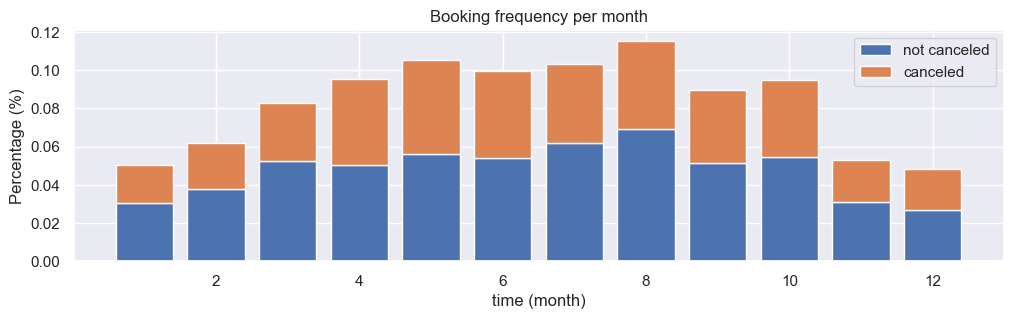

In [131]:
title = "Booking frequency per month"
dfx,dfx2 =getstackedplot(df2,"month_number","time (month)",title,12,3,0,0,False,True)

**Percentage of canceled and not canceled bookings per month**

In [148]:
#per_canceled = percentage of bookings canceled per month
#per_not_canceled = perentage of bookings not canceled per month
df222 = getcancelationrate(dfx,"month_number")
df222.sort_index(inplace=True)
df222.head(12)

,per_month_number_not_canceled,per_month_number_canceled
month_number,,
1,0.602524,0.397476
2,0.611750,0.388250
3,0.632887,0.367113
4,0.529070,0.470930
5,0.531674,0.468326
6,0.542562,0.457438
7,0.601076,0.398924
8,0.598761,0.401239
9,0.574205,0.425795


**Conclusions:**

    1. The second and third quarter of the year seem to be the period of the year with most bookings. There is a
    possibility of seasonal effects. The month seems to be a relevant feature. The mean cancellation rate per month seems
    to be around 42%, distributed similarly through the different months.
    

**Which are the days with the most booking?**

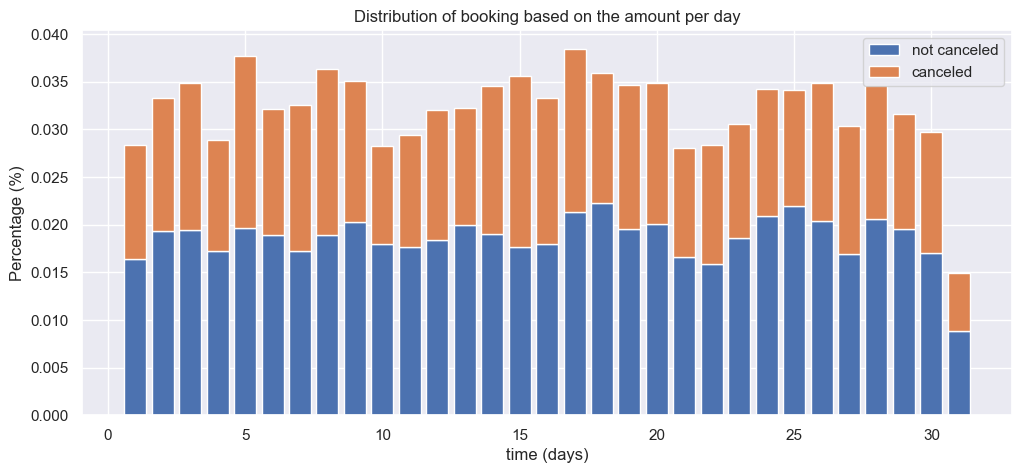

In [150]:
#getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False):
title = "Distribution of booking based on the amount per day"
dfx,dfx2 =getstackedplot(df2,"arrival_date_day_of_month","time (days)",title,12,5,0,0,False)

**Conclusions:**

    1.  The Statistics about the distribution of the amount of bookings over the month seem to suggest
    that almost the same number of bookings can be expected daily. In the case of the 31th day with   
    almost half of the bookings relative to the other days, this could be explained by the fact that only 7 of 12 months
    consist of 31 days. 
    2.  How seen by the monthly distribution of the bookings, in the case of the daily distribution the cancellation rate 
    seems to follow the same pattern.

**Which are the weeks of the year with the most bookings?**  

Taking into account that a non-leap year consists of 365 days, the number of weeks expected is 52.14. 


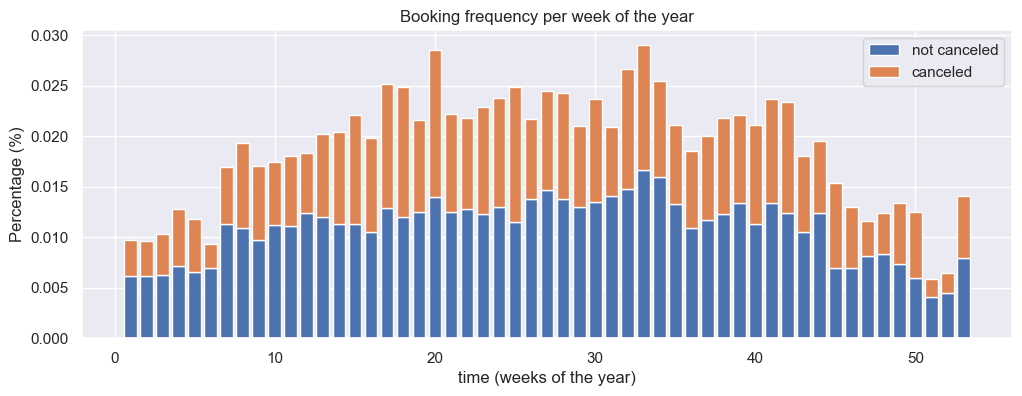

In [151]:
#getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False):
title = "Booking frequency per week of the year"
dfx,dfx2 =getstackedplot(df2,"arrival_date_week_number","time (weeks of the year)",title,12,4,0,0,False)

In [152]:
#per_canceled = percentage of bookings canceled per month
#per_not_canceled = perentage of bookings not canceled per month
df222 = getcancelationrate(dfx, "arrival_date_week_number")
df222.head()

,per_arrival_date_week_number_not_canceled,per_arrival_date_week_number_canceled
arrival_date_week_number,,
1,0.631148,0.368852
8,0.565574,0.434426
14,0.556420,0.443580
41,0.565217,0.434783
44,0.634146,0.365854


**Conclusions:**

    1.   At first glance, the distribution of reservations by week of the year corresponds quite well with the monthly 
    distribution seen before.
    2.  On the other side, the mean percentage of cancellation is also by 41% as in the last cases.

**How is the distribution of the bookings concierning the stay nights?** 

In the next diagramm, the percentage and cummulative histograms of bookings based on the total number of nights booked are shown. 

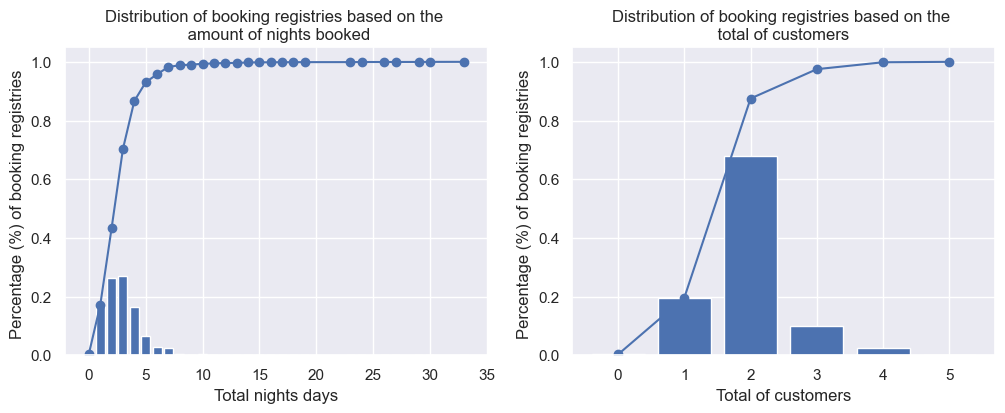

In [350]:
# Sum of registries based on the number of nights booked. 
# the "normalize=True" indicates the corresponding percentage.
dfx = df2.total_nights_days.value_counts(normalize=True).reset_index()
dfx = dfx.sort_values(by="total_nights_days")
dfx.set_index("total_nights_days",inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2)

#fig.figure(figsize=(5,3))

# Set the figure size for the first subplot
fig1 = axes[0].get_figure()
fig1.set_figwidth(12)  # Set the width of the figure
fig1.set_figheight(4)  # Set the height of the figure

#Visualization of percentage histogram by using a bar plot.
axes[0].bar(dfx.index,dfx.proportion)

#Visualization of cummulative histogram by accumulative sum "np.cumsum"
cdf = np.cumsum(dfx.proportion)
axes[0].plot(dfx.index, cdf, label='Cumulative Histogram', color='b',linestyle="-",marker="o")

axes[0].set_title("Distribution of booking registries based on the \n amount of nights booked")
axes[0].set_ylabel("Percentage (%) of booking registries ")
axes[0].set_xlabel("Total nights days")

########### SECOND PLOT ###############
# Sum of registries based on the number of nights booked. 
# the "normalize=True" indicates the corresponding percentage.
dfx = df2.total_of_customers.value_counts(normalize=True).reset_index()
dfx = dfx.sort_values(by="total_of_customers")
dfx.set_index("total_of_customers",inplace=True)
# Set the figure size for the first subplot
fig2 = axes[1].get_figure()
fig2.set_figwidth(12)  # Set the width of the figure
fig2.set_figheight(4)  # Set the height of the figure
axes[1].bar(dfx.index,dfx.proportion)
#Visualization of cummulative histogram by accumulative sum "np.cumsum"
cdf = np.cumsum(dfx.proportion)
axes[1].plot(dfx.index, cdf, label='Cumulative Histogram', color='b',linestyle="-",marker="o")
axes[1].set_title("Distribution of booking registries based on the \n total of customers ")
axes[1].set_ylabel("Percentage (%) of booking registries ")
axes[1].set_xlabel("Total of customers")

plt.show()

**Cancellation rate**

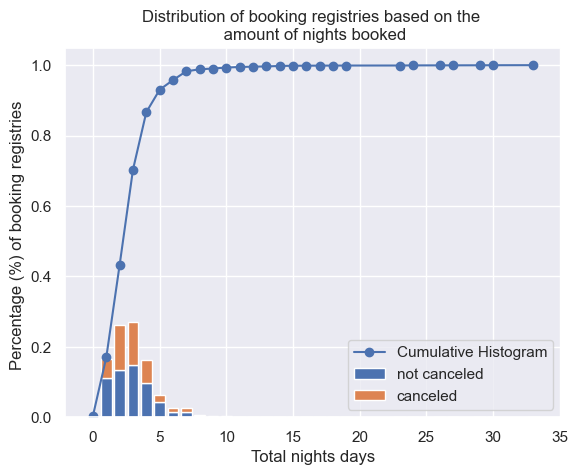

In [351]:
#Exctracting registries asigned as not_canceled based on the total nights of stay
df3 = df2[df2.is_canceled == 0]
dfx = getbarplotdf(df3,"total_nights_days",df2.shape[0])
dfx = dfx.reset_index()

#Exctracting registries asigned as canceled based on the total nights of stay
df3 = df2[df2.is_canceled == 1]
dfx1 = getbarplotdf(df3,"total_nights_days",df2.shape[0])
dfx1 = dfx1.reset_index()

#SPECIAL CASE: it can occure that 
# Extracting list of days per nights
dfxlist = dfx.total_nights_days.unique()
dfxlist1 = dfx1.total_nights_days.unique()
lista = list(set(dfxlist).union(set(dfxlist1)))

data = {"total_nights_days":lista}
df222 = pd.DataFrame(data)
df222.head()
df223 = df222.merge(dfx,how="left",on="total_nights_days").merge(dfx1, how="left",on="total_nights_days")
df223.rename(columns={"count_x":"not_canceled","count_y":"canceled"},inplace=True)
df223.fillna(0.0,inplace=True)
df223 = df223.sort_values(by="total_nights_days")
df223["total"] = df223.not_canceled + df223.canceled
df223["not_canceled_per"] = df223["not_canceled"]/df223.total
df223["canceled_per"] = df223["canceled"]/df223.total
df223.set_index("total_nights_days",inplace=True)
plt.bar(df223.index,df223["not_canceled"],label="not canceled")
plt.bar(df223.index,df223["canceled"],label="canceled",bottom = df223["not_canceled"])

dfx3 = df2.total_nights_days.value_counts(normalize=True).reset_index()
dfx3 = dfx3.sort_values(by="total_nights_days")
dfx3.set_index("total_nights_days",inplace=True)
#Visualization of cummulative histogram by accumulative sum "np.cumsum"
cdf = np.cumsum(dfx3.proportion)
plt.plot(dfx3.index, cdf, label='Cumulative Histogram', color='b',linestyle="-",marker="o")


plt.title("Distribution of booking registries based on the \n amount of nights booked")
plt.ylabel("Percentage (%) of booking registries ")
plt.xlabel("Total nights days")

plt.legend()
plt.show()


**Porcentage of cancellation based on the number of nights to stay**

In [352]:
df223[["not_canceled_per","canceled_per"]].head()

,not_canceled_per,canceled_per
total_nights_days,,
0,0.961538,0.038462
1,0.673040,0.326960
2,0.508459,0.491541
3,0.551451,0.448549
4,0.601069,0.398931


**Conclusions**:  

    1. Over 98% of the bookings cover a stay up to 7 nights. In other words, longer stays than a week are very rare. Around
    50% of the rooms are booked for 2 o 3 nights. 
    2. Concierning the number of customers for which a reservation is done, the histograms show that 97.5% of the
    bookings are for maximum 3 persons, dominating bookings for two persons with almost 70% of the cases.

**Percentage of families booking?** 


In [353]:
#limiting the number of registries to family type booking
dffam = df2[df2.family == 1].copy()
print("Percentage of booking referring to families", dffam.shape[0]*100/df2.shape[0], "%")

# Visualization of distribution of size of the families
dffam = dffam.groupby(["family","family_size"])["is_canceled"].count()*100/dffam.shape[0]
dffam = dffam.reset_index()
dffam.rename(columns={"is_canceled":"percentage (%)"},inplace=True)
dffam[["family_size","percentage (%)"]].head(10)


Percentage of booking referring to families 6.846489488298294 %


,family_size,percentage (%)
0,1,0.115875
1,2,7.068366
2,3,57.358053
3,4,33.371958
4,5,2.085747


**Conclusiones:** 
    
    1. The percentage of the family type booking is minimal with only 6.84% of the total of registries. Around the 90%
    percentage of the families booking consist of 3 to 4 members. 

**Distribution of deposit type** 

        index  deposit_type
0  No Deposit      0.837921
1  Non Refund      0.161920
2  Refundable      0.000159


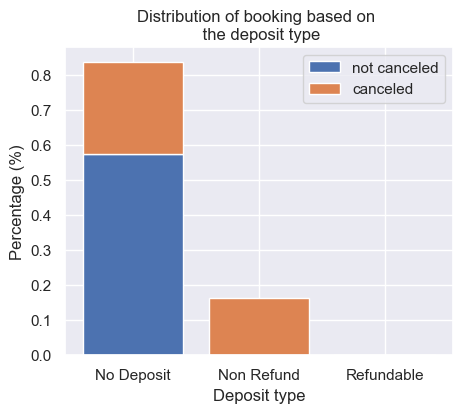

In [156]:
#getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False):
title = "Distribution of booking based on \n the deposit type"
dfx,dfx2 = getstackedplot(df2,"deposit_type","Deposit type",title,5,4,0,0,False)

**Conclusions:** 
    
    1. The 83.7% of the bookings are with No Deposit, meaning that an upfront payment is not requiered. Only, in 16% 
    of the cases, the booking is chosen as "non refund". Refundable bookings are a rare choice for the customer. 

**Distribution of total requests done by customer**  

Segment bookings based on the number of special requests to understand the behavior of guests with different request levels

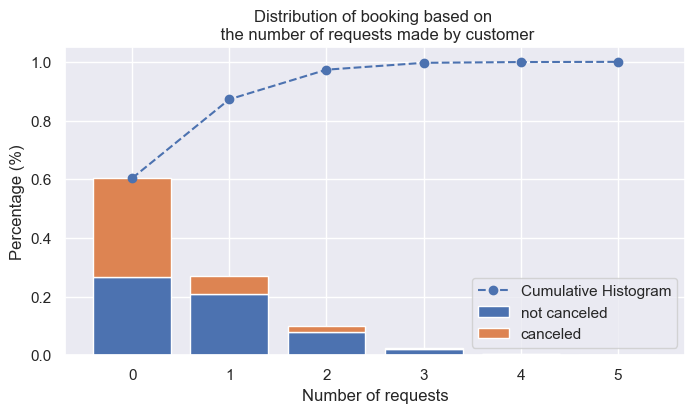

In [164]:
#getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False):
title = "Distribution of booking based on \n the number of requests made by customer"
dfx,dfx2 = getstackedplot(df2,"requests","Number of requests",title,8,4,1,0,False)


**Conclusions:**  

     1. The 60.3% of the bookings are done without requests. Only the 36% of the booking contain from 1 to 2 requests.
     Three or more requests are rare events.  
     
     no request cancelation rate higher than 50%
     one request cancellation rate around 10%
     two requests cancellation rate aroung 1%
     more than two requests cancellation rate around 0%
     
     
     Targeted Communication: For bookings with no special requests and a cancellation rate higher than 50%, consider implementing targeted communication strategies. Engage with these guests before their stay, offer personalized incentives, or provide flexible cancellation policies to reduce cancellations.
Enhanced Services: For bookings with one special request and a cancellation rate around 10%, focus on enhancing services or amenities related to the specific request. Providing exceptional experiences tied to the request can increase guest satisfaction and loyalty, potentially reducing cancellations.
Personalized Approaches: Bookings with two special requests and a cancellation rate around 1% indicate a higher level of guest engagement. Implement personalized approaches, such as pre-stay surveys to understand preferences, to further customize their experience and minimize cancellations.
Retention Strategies: Guests with more than two special requests and a cancellation rate around 0% are highly engaged and loyal. Implement retention strategies, such as loyalty programs, exclusive offers, or personalized perks, to maintain their loyalty and encourage repeat bookings.

**Distribution of customer type** 

The variable "customer type" indicates the type of booking, which can be : 

1. Transient: refers to guests who occupies a room in a hotel, motel or tourist court for less than thirty (30) consecutive days. 
2. Group: refers to guests who book accommodations for a collective purpose. 
3. Contractor: refers to individuals or organizations which seek the services of hospitality.
4. Transient-party: refers to guests, who is temporarily traveling.

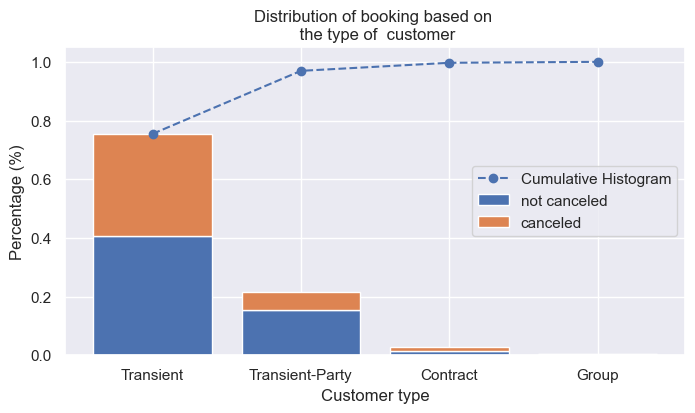

In [165]:
#getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False):
title = "Distribution of booking based on \n the type of  customer"
dfx,dfx2 = getstackedplot(df2,"customer_type","Customer type",title,8,4,1,0,False,True)

**Conclusions**:

    1. The 96.8% of the bookings correspond to Transient and Transient-party guests, who are temporarily traveling, making 
       the main income of the hotel. Meeting the immediate and often urgent needs of transient guests requires hotels to
       maintain a high level of operational flexibility. This includes managing last-minute bookings, providing basic
       services, and ensuring convenience for guests who are predominantly on-the-move. 


    
    

**Distribution of days in waiting lists**

In [357]:
#the "normalize=True" indicates the corresponding percentage.
dfx = df2.days_in_waiting_list.value_counts(normalize=True).reset_index()
dfx = dfx.sort_values(by="proportion",ascending=False)
dfx.set_index("days_in_waiting_list",inplace=True)
dfx.head(5)

,proportion
days_in_waiting_list,
0,0.956763
39,0.003332
58,0.001983
31,0.001587
44,0.001507


**Conclusions:**  
    
    1.   95.6 percent of the customers did not have to wait to get a reservation. Only in around 4% of the cases, the
    customer was put in the waiting list. the latter suggests that the chosen overbooking rate was high enough in order
    to asign a reservation to the most customers.
    
    Despite the low percentage of customers on the waiting list, efficient waitlist management is crucial. Implement automated systems or processes to handle waitlisted guests promptly, communicate effectively about availability, and prioritize reservations based on criteria like loyalty status or booking history.

**Distribution of market segments**   

Market segment designation: 
  1. “TA” means “Travel Agents”
  2. “TO” means “Tour Operations”

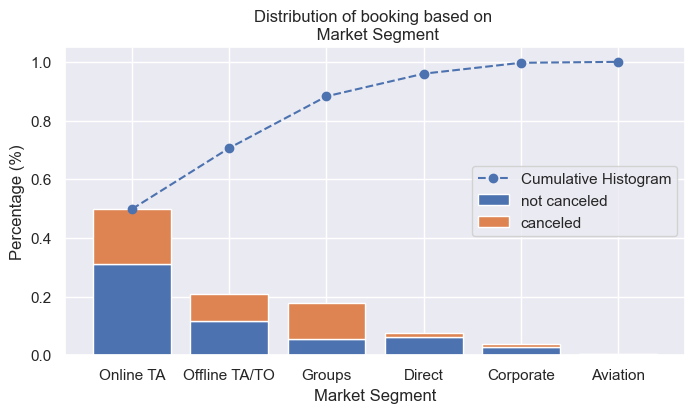

In [166]:
#getstackedplot(df2,var,xlabel,title,width,height,cum=1,rot=0,asc=False):
title = "Distribution of booking based on \n Market Segment"
dfx,dfx2=getstackedplot(df2,"market_segment","Market Segment",title,8,4,1,0,False)


In [168]:
#per_canceled = percentage of bookings canceled per month
#per_not_canceled = perentage of bookings not canceled per month
df222 = getcancelationrate(dfx, "market_segment")
df222.head(10)

,per_market_segment_not_canceled,per_market_segment_canceled
market_segment,,
Online TA,0.621936,0.378064
Offline TA/TO,0.566959,0.433041
Groups,0.304367,0.695633
Direct,0.820988,0.179012
Aviation,0.756098,0.243902
Corporate,0.777778,0.222222


market segment
Online TA 37% bookings canceled
Offline tA/to 43% bookings canceled
Groups   69.5% bookings canceled
Direct   17.9% bookings canceled
Aviation 24.3% bookings canceled
corporate 22.2% bookings canceled

**Conclusions:** 

    1. Around 70% of the bookings were made by a Travel agent or Tour operation. 

Based on the cancellation rates across different market segments provided in the sources, here are conclusions and recommendations for the hotel owner:
Conclusions:
Market Segmentation Impact: The cancellation rates vary significantly across different market segments, indicating the importance of understanding and managing each segment effectively.
Cancellation Patterns: Online TA and Direct bookings have relatively lower cancellation rates compared to Offline TA/to, Groups, Aviation, and Corporate segments, suggesting different booking behaviors and risk factors associated with each segment.
Recommendations:
Segment-Specific Policies: Tailor cancellation policies and strategies based on the characteristics of each market segment. For segments with high cancellation rates like Groups, consider implementing stricter cancellation policies or requiring non-refundable deposits to mitigate revenue loss.
Dynamic Pricing: Implement dynamic pricing strategies to adjust room rates based on demand fluctuations and cancellation patterns in each market segment. Offer flexible pricing options to incentivize direct bookings and reduce cancellations.
Customer Engagement: Enhance customer engagement and communication strategies, especially for high-cancellation segments like Groups and Corporate. Provide personalized services, proactive communication, and value-added benefits to increase guest loyalty and reduce cancellations.
Overbooking Management: Utilize data-driven insights to optimize overbooking strategies across different market segments. Adjust overbooking rates based on cancellation trends and segment-specific demand patterns to maximize revenue while minimizing the impact on guest satisfaction.
Operational Efficiency: Improve operational efficiency by aligning staffing levels, inventory management, and service offerings with the demand characteristics of each market segment. Anticipate cancellations in high-risk segments like Groups and Aviation to optimize resource allocation.
Feedback Analysis: Collect feedback from guests in each market segment to understand the reasons behind cancellations and identify areas for improvement. Use guest insights to refine services, address pain points, and enhance the overall guest experience to reduce cancellations.
Continuous Monitoring: Continuously monitor cancellation rates, booking trends, and guest behavior in each market segment. Stay agile and responsive to market dynamics, adjusting strategies and policies to optimize revenue generation and guest satisfaction across all segments.

**Distribution of the booking by country**

In [211]:
df2[df2.country=="CUB"].head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,customer_type,required_car_parking_spaces,total_of_special_requests,month_number,family,family_size,total_nights_days,total_of_customers,requests,previous_bookings
9,0,9,February,9,26,2,5,1,0,0,...,Transient,0,0,2,0,0,7,1,0,0


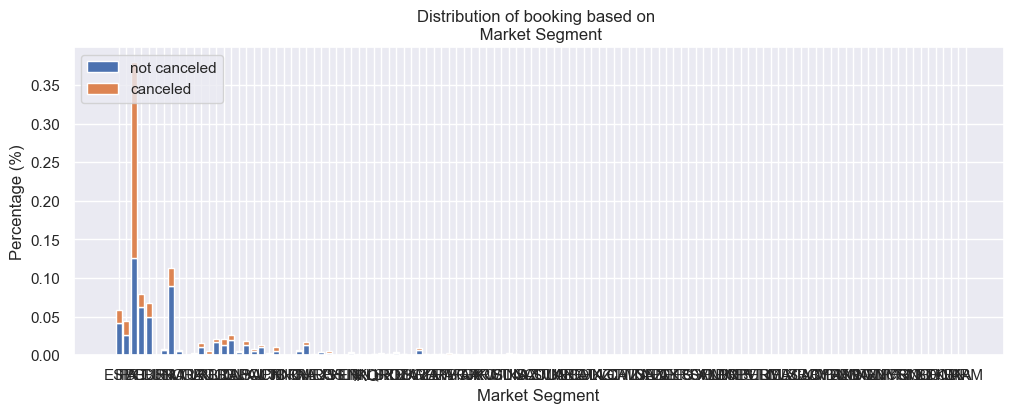

In [259]:
title = "Distribution of booking based on \n Market Segment"
dfx,dfx2=getstackedplot(df2,"country","Market Segment",title,12,4,0,0,True,True)

In [260]:
df22_ = (df2.country.value_counts()).reset_index().set_index("index")
#per_canceled = percentage of bookings canceled per month
#per_not_canceled = perentage of bookings not canceled per month
df222 = getcancelationrate(dfx, "country")
df222 = df222.sort_values(by="per_country_canceled", ascending=False)
df222 = df222.merge(df22_,how="inner",left_index=True, right_index=True).sort_values(by="country",ascending=False)
df222.columns=["%_bookings_not_canceled","%_bookings_canceled","number_of_bookings"]
df222.to_excel("test.xlsx")
df222.head()

,%_bookings_not_canceled,%_bookings_canceled,number_of_bookings
PRT,0.332568,0.667432,4790
FRA,0.791961,0.208039,1418
DEU,0.796576,0.203424,993
GBR,0.730233,0.269767,860
ESP,0.704698,0.295302,745


Number of different countries  114


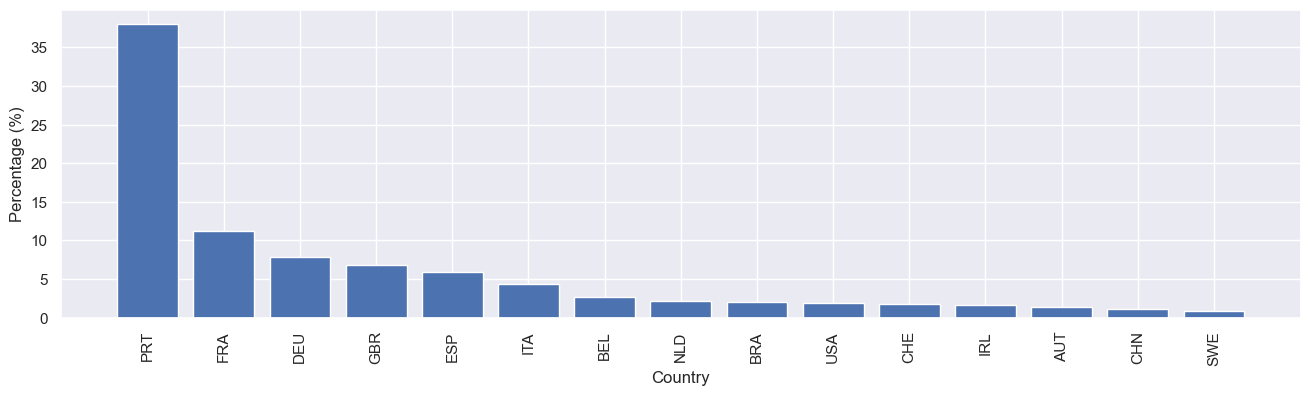

In [199]:
print("Number of different countries ", df2.country.nunique())
#the "normalize=True" indicates the corresponding percentage.
dfx = df2.country.value_counts(normalize=True).reset_index()
dfx = dfx.sort_values(by="country",ascending=False)
dfx.set_index("index",inplace=True)
plt.figure(figsize=(16,4))
plt.bar(dfx[0:15].index, dfx[0:15].country*100)
plt.ylabel("Percentage (%)")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.show()


**Conclusions**:
    
    1. Of the 114 countries represented, only the first 15 according to the bar plot before
    correspond to 89.4% of the reservations. The most customers come from the European Union and Great Britain. 

The conclusions drawn from the data on hotel booking cancellations by country provide valuable insights into the cancellation patterns across different regions. By analyzing the percentage of bookings canceled and not canceled, as well as the total number of bookings in each country, we can understand how travelers behave when making hotel reservations.
High Percentage of Bookings Not Canceled: Countries like Austria, the Netherlands, and France have a high percentage of bookings that are not canceled. This indicates a higher level of commitment from travelers in these countries when they make hotel reservations.
High Percentage of Bookings Canceled: On the other hand, countries like Serbia, Algeria, and Angola have a high percentage of bookings that are canceled. This suggests a higher likelihood of changes in travel plans or uncertainties among travelers in these regions.
Number of Bookings: Countries with a significant number of bookings, such as Portugal, France, and Germany, demonstrate a strong presence in the hotel booking market. This data can help hotels understand the demand in different regions and tailor their strategies accordingly.
Implications for Hotels: Understanding these cancellation patterns can help hotels adjust their policies, pricing strategies, and marketing efforts to reduce cancellations, optimize revenue, and enhance the overall guest experience.
By interpreting these findings, hotels can make informed decisions to better manage their bookings, improve customer satisfaction, and ultimately drive business growth.

**Distribution of bookings based on the choice of meal**  

    1. "BB" refers to "Bed and Breakfast"
    2. "FB" stands for "Full Board", which is a meal plan that includes the cost of the room, breakfast, lunch, and 
    dinner.
    3. "HB" stands for "Half Board," which includes bed, breakfast, and an evening meal, 
    with no drinks included in the evening.
    4. "SC" refers to "Self-Catering." Self-catering accommodations provide guests with the flexibility to prepare
    their own meals, typically in a fully equipped kitchen within their lodging. T

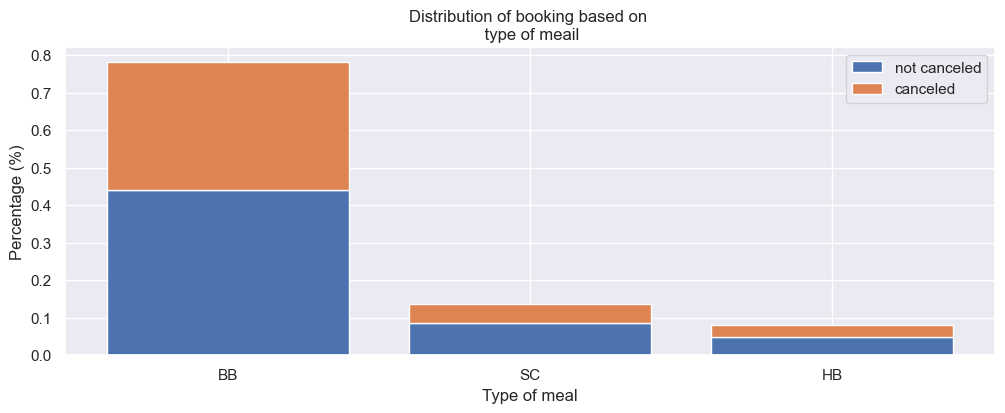

In [228]:
title = "Distribution of booking based on \n type of meail"
dfx,dfx2=getstackedplot(df2,"meal","Type of meal",title,12,4,0,0,True,True)

In [231]:
df22_ = (df2.meal.value_counts()).reset_index().set_index("index")
#per_canceled = percentage of bookings canceled per month
#per_not_canceled = perentage of bookings not canceled per month
df222 = getcancelationrate(dfx, "meal")
df222 = df222.sort_values(by="per_meal_canceled", ascending=False)
df222 = df222.merge(df22_,how="inner",left_index=True, right_index=True).sort_values(by="meal",ascending=False)
df222.columns=["%_bookings_not_canceled","%_bookings_canceled","number_of_bookings"]
df222.to_excel("test.xlsx")
df222.head()

,%_bookings_not_canceled,%_bookings_canceled,number_of_bookings
BB,0.563546,0.436454,9859
SC,0.627746,0.372254,1730
HB,0.615079,0.384921,1008
FB,NaN,NaN,8


In [233]:
df2[df2.meal == "FB"].head(10)

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,customer_type,required_car_parking_spaces,total_of_special_requests,month_number,family,family_size,total_nights_days,total_of_customers,requests,previous_bookings
2074,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
2221,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
3684,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
7850,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
9817,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
11755,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
12441,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0
12550,1,98,November,48,23,1,2,1,0,0,...,Transient-Party,0,0,11,0,0,3,1,0,0


**Conclusions:**  
    
    1.  The most customers with around 80% prefer an accomodation with breakfast included. A Full Board accomodation
    seems not to be an option for the customers. The cancellation rate seems to be around the same percentage seen before. 

Based on these conclusions, here are some recommendations for the hotel owner:


Promote Bed and Breakfast (BB) Option: Since the data shows that the Bed and Breakfast (BB) option has the lowest cancellation rate, the hotel owner can focus on promoting this option to attract more bookings. Highlight the benefits of having breakfast included in the stay to entice guests.

Improve Self-Catering (SC) and Half Board (HB) Options: Although the cancellation rates for Self-Catering (SC) and Half Board (HB) are slightly higher than Bed and Breakfast (BB), they still have a relatively low cancellation rate. The hotel owner can consider enhancing the offerings and services for these meal options to make them more appealing to guests.

Monitor and Adjust Full Board (FB) and 2 Meals (2) Options: Since there is no information available for Full Board (FB) and 2 meals (2), it is important for the hotel owner to monitor the performance of these options. If there is a significant demand for these meal options, the owner should ensure that the offerings and services meet the expectations of the guests to minimize cancellations.

Collect Guest Feedback: To further understand the reasons behind cancellations and to improve the overall guest experience, the hotel owner should collect feedback from guests who have canceled their bookings. This feedback can provide valuable insights into areas that need improvement and help in making informed decisions to reduce cancellations.

**Distribution of previous bookings intention**

number of registry not canceled (7262, 28)
number of registries not canceled  (7262, 28)
       previous_bookings_not_canceled
index                                
0                            0.559381
1                            0.006743
2                            0.001904
3                            0.001031
4                            0.000873
5                            0.000635
7                            0.000555
9                            0.000555
14                           0.000397
6                            0.000397
15                           0.000397
10                           0.000397
8                            0.000317
18                           0.000238
13                           0.000238
11                           0.000238
16                           0.000159
19                           0.000159
29                           0.000159
30                           0.000159
23                           0.000159
17                           0.000159

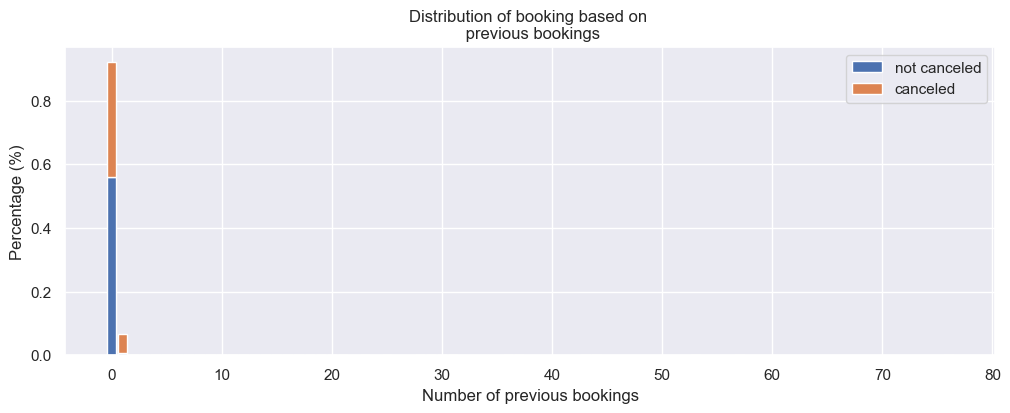

In [275]:
title = "Distribution of booking based on \n previous bookings"
dfx,dfx2=getstackedplot(df2,"previous_bookings","Number of previous bookings",title,12,4,0,0,True,True)

In [276]:
dfx.head(60)

,previous_bookings_not_canceled,previous_bookings_canceled
previous_bookings,,
0,0.559381,0.362237
9,0.000555,0.000079
1,0.006743,0.060214
2,0.001904,0.000238
3,0.001031,0.000238
8,0.000317,0.000000
5,0.000635,0.000079
30,0.000159,0.000000
19,0.000159,0.000000


In [277]:
df22_ = (df2.previous_bookings.value_counts()).reset_index().set_index("index")
#per_canceled = percentage of bookings canceled per month
#per_not_canceled = perentage of bookings not canceled per month
df222 = getcancelationrate(dfx, "previous_bookings")
df222 = df222.sort_values(by="per_previous_bookings_canceled", ascending=False)
df222 = df222.merge(df22_,left_index=True, right_index=True).sort_values(by="previous_bookings",ascending=False)
df222.columns=["%_bookings_not_canceled","%_bookings_canceled","number_of_bookings"]
df222.to_excel("test.xlsx")
df222.head(70)

,%_bookings_not_canceled,%_bookings_canceled,number_of_bookings
0,0.606955,0.393045,11617
1,0.100711,0.899289,844
2,0.888889,0.111111,27
3,0.812500,0.187500,16
4,1.000000,0.000000,11
5,0.888889,0.111111,9
6,0.555556,0.444444,9
9,0.875000,0.125000,8
7,1.000000,0.000000,7
10,0.833333,0.166667,6


Number of Previous Bookings Analysis:

Guests with no previous bookings have a cancellation rate of 39.30%, while guests with one previous booking have a significantly higher cancellation rate of 89.93%.
Guests with higher numbers of previous bookings tend to have lower cancellation rates, with guests who have four or more previous bookings having a cancellation rate of 0%.
The hotel owner should focus on building customer loyalty and encouraging repeat bookings. Offering incentives or rewards for guests with multiple previous bookings can help reduce cancellation rates and increase customer satisfaction.

**Conclusions:** 
    
    1. The 92% of the customers making a booking have not done any before or there are no registries about data. They 
    can be labeled as new customer. The results show that 60.6% of them do not cancel the booking,indicanting that the most
    new customers tend to use the booked service. On the other side, customers, who have chosen this accomodation 
    once, tends to cancel the bookings. 
    
    

### Summary ###

Based on the provided information, several conclusions can be grouped as:


    1. Seasonal Trends: The second and third quarters of the year experience the highest volume of bookings, 
    suggesting potential seasonal effects. This could be influenced by factors such as weather, holidays, or tourist
    seasons.

    2.  Cancellation Patterns: The cancellation rate remains relatively consistent at around 42% across different months,
    reflecting a stable distribution. This provides valuable insight for managing reservation expectations and staffing
    levels.

    3.  Booking Distribution: The distribution of bookings suggests a relatively uniform number of bookings daily, 
    with the exception of the 31st day due to variations in the number of days in different months.

    4.  Stay Duration: The majority of bookings cover stays of up to 7 nights, with longer stays being rare. 
    Additionally, around 50% of rooms are booked for 2 or 3 nights, indicating a preference for shorter stays.

    5.  Customer Preferences: The data shows that the majority of bookings are for a maximum of 3 persons, with a 
    significant preference for accommodations with breakfast included. Full-board options are not popular among customers.

    6.  Booking Channels: Around 70% of bookings are made through travel agents or tour operations, highlighting the 
    importance of partnerships with these entities in driving business.

    7.  Customer Origin: A large percentage of customers originate from the European Union and Great Britain, indicating 
    the importance of catering to the needs and preferences of these customer segments.

    8.  Operational Flexibility: The majority of bookings correspond to transient guests, emphasizing the need for hotels
    to maintain high operational flexibility to accommodate the immediate and often urgent needs of these guests.

    9.  Waiting List and Overbooking: The data suggests that the chosen overbooking rate was high enough to assign a 
    reservation to most customers, as only around 4% of customers were put on a waiting list.

    10.  Cancellation Consistency: The cancellation rate remains around the same percentage across various patterns, 
    indicating a stable trend that can be factored into operational and financial planning.

    11.  Customer Behavior and Repeat Bookings: The majority of customers making a booking are new customers (92%), with
    around 60.6% of them not canceling the booking, suggesting a tendency for new customers to use the booked service.
    Customers who have chosen the accommodation once tend to cancel the bookings, indicating a different cancellation
    pattern for repeat customers.

Based on the provided information, here are some recommendations for the hotel owner:


Seasonal Trends: Take advantage of the seasonal trends by implementing early planning strategies to prevent revenue declines during low-demand seasons. Consider offering last-minute deals and non-refundable special deals during high-demand seasons to maintain full occupancy rates 
.

Cancellation Patterns: Since the cancellation rate remains relatively consistent across different months, it is important to manage reservation expectations and staffing levels accordingly. Monitor cancellation patterns closely and adjust staffing levels based on anticipated cancellations.

Booking Distribution: With a relatively uniform number of bookings daily, except for the 31st day due to variations in the number of days in different months, ensure operational flexibility to accommodate the immediate needs of transient guests. Maintain high operational standards to provide excellent customer experiences for positive reviews, referrals, and customer retention 
.

Stay Duration: Focus on catering to the preference for shorter stays, as the majority of bookings cover stays of up to 7 nights. Consider offering attractive packages and promotions for shorter stays to attract more bookings.

Customer Preferences: Since the majority of bookings are for a maximum of 3 persons and there is a significant preference for accommodations with breakfast included, ensure that the breakfast offering is of high quality and meets customer expectations. Evaluate the popularity of full-board options and consider adjusting the offerings based on customer demand 
.

Booking Channels: Strengthen partnerships with travel agents and tour operators, as around 70% of bookings are made through these channels. Collaborate with these entities to drive more business and increase bookings.

Customer Origin: Given that a large percentage of customers originate from the European Union and Great Britain, tailor your services and offerings to cater to the needs and preferences of these customer segments. Consider providing language support, cultural amenities, and targeted marketing campaigns to attract more customers from these regions.

Operational Flexibility: As the majority of bookings correspond to transient guests, maintain high operational flexibility to accommodate their immediate and often urgent needs. Ensure that your staff is well-trained and equipped to handle last-minute requests and provide exceptional service to transient guests.

Waiting List and Overbooking: Since only around 4% of customers were put on a waiting list, the chosen overbooking rate seems to be effective. However, continue monitoring the waiting list and adjust the overbooking rate if necessary to ensure maximum occupancy without inconveniencing guests.

Customer Behavior and Repeat Bookings: Recognize the different cancellation patterns for new customers and repeat customers. Focus on providing excellent service and incentives to encourage repeat bookings and reduce cancellations among repeat customers. Implement strategies to attract new customers and build customer loyalty [[11]].


By implementing these recommendations, the hotel owner can optimize revenue, improve customer satisfaction, and enhance operational efficiency.

## PREPROCESSING SOME VARIABLE ##

**Converting categorical variables into numeric ones by label encoding**

1. meal
2. country
3. market segment
4. deposit_type
5. customer_type

In order to distinguish from the original column, the posfix "_num" will be added to the column name

In [278]:
df3 = df2.copy()
varlist = ["meal", "country","market_segment","deposit_type","customer_type"]
for var in varlist:
    #Extracting unique label in country variable as lists
    listvar = list(df3[var].unique())
    #Generating dictionary with label enconding
    vardict = {value: index for index, value in enumerate(listvar)}
    #Enconding of the labesl per column
    df3[var+"_num"] = df3[var].map(vardict)

one-hot encoding

In [287]:
df3 = df2.copy()
varlist = ["meal", "country","market_segment","deposit_type","customer_type"]
df_encoded = pd.get_dummies(df3, columns=varlist)
df_encoded.head()
#print(df3.columns)
#df3.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,133,January,1,3,0,3,2,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,39,February,8,25,2,1,2,2,0,...,0,0,1,1,0,0,0,0,1,0
2,1,44,March,14,27,2,3,3,0,0,...,0,0,1,1,0,0,0,0,1,0
3,1,129,October,41,7,0,1,3,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,36,October,44,28,1,2,2,0,0,...,0,0,1,1,0,0,0,0,1,0


## Correlation of variables ##

For the computation of the pairwise correlation of columns in a DataFrame, the categorical variables referring
to nominal data have to be excluded because they can not be operated on mathematically.

A correlation value close to 1 or -1 indicates a strong positive or negative correlation, while values close to 0 indicate a weak correlation.


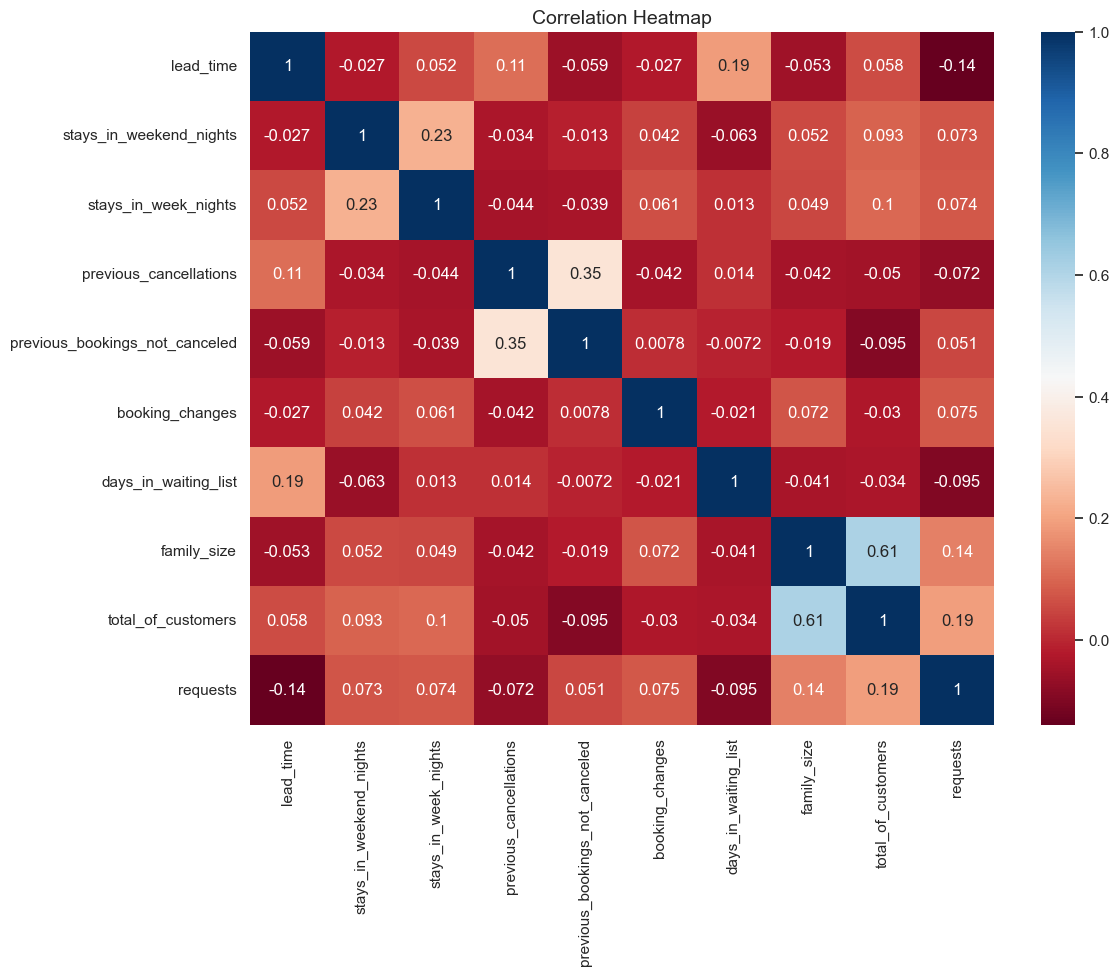

In [363]:
listvar_ = ["lead_time","stays_in_weekend_nights","stays_in_week_nights","previous_cancellations","previous_bookings_not_canceled",
           "booking_changes","days_in_waiting_list","family_size","total_of_customers","requests"]
df4 = df3[listvar_].copy()
plt.figure(figsize=(12,9))
correlation_matrix = df4.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

**Conclusions:** 
    
    The majority of variables exhibit weak correlations with each other, with coefficients below 0.3, indicating a low
    linear relationship. However, the variable "previous_cancellation" appears to have a stronger correlation with
    "previous_booking_not_canceled" compared to the other variables.
    
     

### EXPLORATORY ANALYSIS BY CUSTOMER SEGMENTATION  using K MEANS ### 

Customer segmentation plays a crucial role in predicting hotel booking
cancellations in the hospitality industry. 

Even though there is already a customer type, the purpose of the new categorization is to segment
them based on shared characteristics and behaviours contained in the different variables forming
the dataset. 

In [385]:
# List of variable to use for customer segmentation
listvar_ = ["lead_time","adults","booking_changes","days_in_waiting_list",
            "family","total_nights_days","total_of_customers","requests","previous_bookings",
           "meal_num","country_num","market_segment_num","deposit_type_num","customer_type_num"]

**Elbow methods for the determination of the optimal number of cluster**  

The elbow method is a technique used in clustering analysis to determine the optimal number of clusters in the K-Means algorithm. It involves plotting the within-cluster sum of squares (WCSS) for different cluster numbers and identifying the elbow point where WCSS starts to level off.

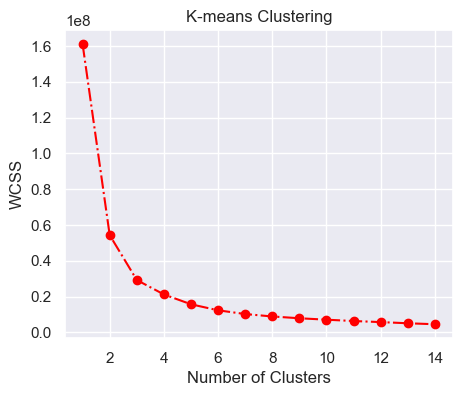

In [388]:
df5 = df3[listvar_].copy()
# Perform K-means clustering. We consider 1 to 15 clusters, so our for loop runs 10 iterations.
# And we set a random state for reproducibility.
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df5)
    wcss.append(kmeans.inertia_)
    
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (5,4))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

**Conclusion:**   
     The optimal cluster number by within sum of square seems to be 4.

**Applying K-means algorithm based on 4 cluster**

In [389]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df5)

KMeans(n_clusters=4, random_state=42)

**Asignment of results of clustering to the original data set**

In [390]:
# Using original data set df3
df_segm= df3.copy()

#Dictionary
customerkmeans = {0:"Planner",1:"Strategic",2:"Proactive",3:"Immediate"}

df_segm['kmeans'] = kmeans.labels_
df_segm["kmeans_customer"] = df_segm["kmeans"].map(customerkmeans)


**Visualization of Statistics based on the customer type by k-means**

In [391]:
# clustering id : 0,1,2,3
kmeans_ = 0
# Filtering data
dfmean0=df_segm[df_segm.kmeans == kmeans_].copy()
print("Percentage of registry ", dfmean0.shape[0]*100/df_segm.shape[0], "%")
dfmean0.describe().transpose()

Percentage of registry  30.003966679888933 %


,count,mean,std,min,25%,50%,75%,max
is_canceled,3782.0,0.475145,0.499448,0.0,0.0,0.0,1.0,1.0
lead_time,3782.0,131.144104,33.120940,79.0,102.0,128.0,159.0,197.0
arrival_date_week_number,3782.0,26.077737,11.538388,1.0,17.0,25.0,34.0,53.0
arrival_date_day_of_month,3782.0,15.845320,8.900706,1.0,8.0,16.0,24.0,31.0
stays_in_weekend_nights,3782.0,0.913538,0.893233,0.0,0.0,1.0,2.0,10.0
stays_in_week_nights,3782.0,2.441565,1.404322,0.0,2.0,2.0,3.0,20.0
adults,3782.0,1.910100,0.516185,0.0,2.0,2.0,2.0,4.0
children,3782.0,0.095717,0.376284,0.0,0.0,0.0,0.0,3.0
babies,3782.0,0.004495,0.066903,0.0,0.0,0.0,0.0,1.0
previous_cancellations,3782.0,0.051824,0.397640,0.0,0.0,0.0,0.0,13.0


**Conclusions:** 
    

The clustering analysis reveals distinct customer types based on their booking behavior:

***Planner Customers (Customer type 0)***: This group constitutes 30.0% of the customers. They likely exhibit a balanced and organized approach to booking, possibly planning their stays well in advance. The "Planner Customers" segment comprises guests  with an average lead time of approximately 131 days. Typically, these bookings involve around 2 adults, indicating a preference for small groups or couples. While most bookings in this segment undergo minimal changes, there is variability in waiting times and the number of requests made by guests. 

***Strategic Planners (Customer type 1)***: This segment represents 4.62% of the customers. Their low percentage suggests a smaller subset of guests who may have specific strategic or long-term booking patterns with an average lead time of approximately 418 days. Similar to Planner Customers, they also prefer small groups or couples, but with a lower average number of requests. The longer lead time and potential differences in the booking process suggest a strategic and meticulous approach to planning, hence the label "Strategic Planners."

***Proactive Organizers (Customer type 2)***: Comprising 13.8% of the customers, this group likely demonstrates a proactive and methodical approach to their bookings, possibly with a focus on advanced planning and organization, with an average lead time of approximately 263 days. They, too, prefer small groups or couples and show variability in waiting times and the number of requests made. 



***Immediate Planners (Customer type 3)***: The largest segment, constituting 51.4% of the customers. This group is characterized by a tendency to make immediate or short-term bookings, indicating a preference for more spontaneous or last-minute stays with an average lead time of approximately 30 days. Similar to the other segments, they also prefer small groups or couples and exhibit variability in the number of requests made.

A more detailed description of each customer type can be found in the attached document "customer segmentation.docx".




#### Relation of new customer type with cancellation rates ####

In [646]:
df4 = df_segm.copy()

# Group by month, new customer and canceled. Count the number of registry.
df5 = df4.groupby(["arrival_date_month","kmeans_customer","is_canceled"])["adults"].count().reset_index()
# Calculation of monthly distribution of each new customer type
df5["percentage"] = df5.adults/df5.groupby(["arrival_date_month"])["adults"].transform('sum')
# Rename columns
df5.columns = ["month","customer type","is_canceled","bookings","cancellation rate"]
# Filter those registries indicating a cancellation.
df5 = df5[df5.is_canceled == 1]
df5["is_canceled"] = "Yes"
#Filtering columns
df5 = df5[["month","customer type","is_canceled","cancellation rate"]]
df5.head()

,month,customer type,is_canceled,cancellation rate
1,April,Immediate,Yes,0.151993
3,April,Planner,Yes,0.249169
5,April,Proactive,Yes,0.056478
6,April,Strategic,Yes,0.013289
8,August,Immediate,Yes,0.097729


**Conclusions:**

***Cancellation Rates by Customer Type and Month:*** Immediate and planner customer types exhibit varying cancellation rates across different months, with relatively higher rates in specific months such as February, January, and November.
Proactive and strategic customer types consistently maintain lower cancellation rates across the months, indicating a more stable booking behavior.

***Seasonal Variations in Cancellation Rates:*** Immediate and planner customer types show fluctuations in cancellation rates, potentially indicating seasonal or event-related trends affecting their booking and cancellation behaviors.
Proactive and strategic customer types demonstrate more consistent and predictable cancellation rates throughout the year, suggesting a steadier pattern of behavior.

***Booking and Cancellation Behavior:*** Immediate and planner customer types tend to have higher booking numbers and cancellation rates in certain months, potentially reflecting specific events or seasonal trends influencing their behavior.
Proactive and strategic customer types maintain relatively stable booking patterns and lower cancellation rates, indicating a more consistent and predictable behavior compared to immediate and planner customer types.


# NON-MACHINE LEARNING SOLUTION #

**Average-Overbooking:** This overbooking approach operates under the assumption that all customer segments exhibit an equal probability of not showing up, and the actual sales figures are determined based on historical data.

Formula : overbooking limit =   Capacity / 1 - Cancellation rate

Source: Zhai, Q., Tian, Y., Luo, J., & Zhou, J. (2023). Hotel overbooking based on no-show probability forecasts. Computers & Industrial Engineering, 180, 109226.

However, it's important to note that this assumption may not hold true in practice. The Exploratory Analysis done previously showed that new customers often exhibit higher cancellation rates, while older ones tend to have much smaller rates. Even so, if analysis is based on the whole characteristics of behaviour of the customers as identified by the clustering algorithm, Cancellation rates could show lesser variability among the different customer classes. 

The **NON-ML SOLUTION** would imply the following steps:

1. Calculation of cancellation rates based on customer type based on the historical data. 
2. Calculation of overbooking limit based on customer type



In [651]:
dfavebook = df5.copy()

#Room capacity
Capacity = 50

#Distribution by customer type
distcustomer = {"Immediate":0.514,"Planner":0.30,"Proactive":0.138,"Strategic":0.0462}

#Room capacity by customer type
dfavebook["capacity_customer_type"] = 50*dfavebook["customer type"].apply(lambda x: distcustomer[x])

#Calculating overbooking limit
dfavebook["ave_overbooking"] = dfavebook["capacity_customer_type"]/(1 - dfavebook["cancellation rate"])

#Reveneu per customer
dfavebook["Reveneu"] = 300.0*dfavebook["capacity_customer_type"] - 1.00*dfavebook["ave_overbooking"]

dfavebook.head()

,month,customer type,is_canceled,cancellation rate,capacity_customer_type,ave_overbooking,Reveneu
1,April,Immediate,Yes,0.151993,25.70,30.306366,7679.693634
3,April,Planner,Yes,0.249169,15.00,19.977876,4480.022124
5,April,Proactive,Yes,0.056478,6.90,7.313028,2062.686972
6,April,Strategic,Yes,0.013289,2.31,2.341111,690.658889
8,August,Immediate,Yes,0.097729,25.70,28.483677,7681.516323


**Conclusions** for April:

The average overbooking for different customer types reflects the level of overestimation in 
reservations. Despite not having the highest cancellation rate, the "Immediate" 
customer type had the highest average overbooking at 30.3. This can be attributed to the 
fact that this customer type is the most frequent, with a frequency of 51%. In contrast, 
the "Planner" customer type had an average overbooking of 19.98. The "Proactive" customer 
type had a lower average overbooking of 7.31. The "Strategic" customer type, with the lowest 
cancellation rate, exhibited the lowest average overbooking at 2.34. This suggests that the 
overbooking strategy is influenced by both the cancellation rate and the frequency of the customer type.

# MACHINE LEARNING SOLUTION # 

Because the cancellation behaviour of the different customer types is already defined by the variable "is_canceled", 
the following machine learning model will handle the estimation of the probability, that a booking will be canceled or not.

Take into account that the states "Canceled" and "No-Show" are associated with "booking canceled", they will be treated equally. 

When dealing with a dataset containing both numerical and nominal variables, it's essential to employ appropriate machine learning models and preprocessing techniques to effectively handle the different types of data. Here are some insights based on the provided search results:

**Preselection of the variables** 

The following variables will be not used for the training of the model:
1. adults, children and babies: This variables are summarized under the variable "total_of_customers".
2. stays_in_weekend_nights and stays_in_week_nights: This variables are summarized under the variable "total_nights_days".
3. Requiered_park_places and special_requests: This variables are summarized under the variable "requests".
4. deposit_type: This variable is strong unbalanced. More than 80% is set to a single state.
5. days_in_waiting_list: This variable is strong unbalanced. More than 95% is set to a single state. 
6. customer_type: will be replaced by kmeans (new customer types).


Data Imbalance in the predictor dataset can negatively affect the performance of the model, particularly in scenarios with small to medium sample sizes. Imbalanced data can lead to biased predictions impacting the model's inference and prediction capabilities.


**Selecting train and test data set**

In [580]:
# orginal columns
listvar2_ = ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
        'month_number', 'family', 'family_size',
       'total_nights_days', 'total_of_customers', 'requests',
       'previous_bookings', 'meal_num', 'country_num', 'market_segment_num',
       'deposit_type_num', 'customer_type_num', 'kmeans'] 

# clean predictor columns
listvar2_ = ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
         'previous_cancellations','booking_changes',  
        'month_number', 'total_nights_days', 'total_of_customers', 'requests',
       'previous_bookings', 'country_num', 'market_segment_num','kmeans'] 

dfmodel = df_segm[listvar2_].copy() 

# Separate the features (X) and the target variable (y)
X = dfmodel.drop(columns=['is_canceled'])
y = dfmodel['is_canceled']

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
          

**Modeling by Random Forest**  

Random forest is a widely-used machine learning algorithm that combines the output of multiple decision trees to reach a single result. It is known for its ease of use and flexibility, making it suitable for handling both classification and regression problems.

In [581]:
#Defining random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
#Training the model
random_forest.fit(X_train, Y_train)

# Making prediction over the test sets
Y_prediction = random_forest.predict(X_test)

#Calculating score of training set
acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Score Training set ", acc_random_forest_train)
# Evaluate the model's accuracy on the test set_
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print("Score Test  set ", acc_random_forest_test)

Score Training set  99.48
Score Test  set  83.06


**Cross validation**    
Cross-validation is a technique used in  machine learning to assess the generalization performance
of a predictive model. It involves various model validation methods aimed at evaluating how the
results of a statistical analysis will generalize to an independent dataset. 

In [582]:
# Defining Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
# Cross validation methods
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85034688 0.82457879 0.82656095 0.83349851 0.81349206 0.81349206
 0.83333333 0.81845238 0.83531746 0.83333333]
Mean: 0.8282405768716472
Standard Deviation: 0.01079520707378179


**Conclusions**:

The cross-validation results demonstrate that the model exhibits strong and consistent performance across different folds of the data, with a mean score of approximately 0.828 and a relatively low standard deviation. This suggests that the model is reliable and has the potential to generalize effectively to new data.

**Relative importance of the features**

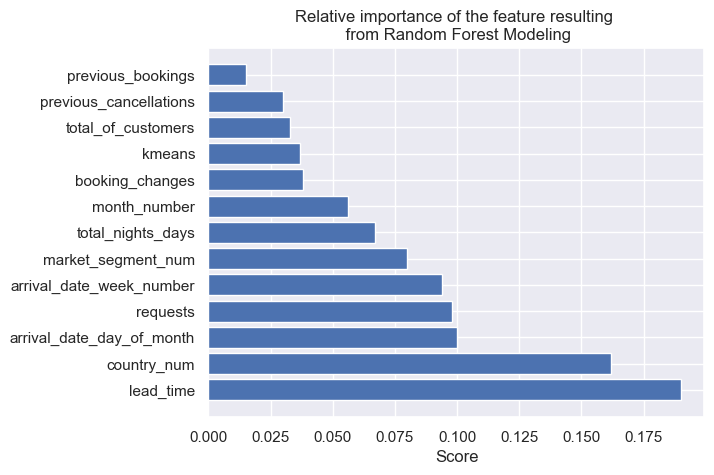

In [583]:
#new Dataframe with results from Random Forest : feature_importance
dfimp = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})

#Sorting based on importance and defining new index
dfimp = dfimp.sort_values('importance',ascending=False).set_index('feature')

#Visualization
plt.title("Relative importance of the feature resulting \n from Random Forest Modeling")
plt.barh(dfimp.index, dfimp.importance)
plt.xlabel("Score")
plt.show()

**Conclusions:** 

1. ***Lead Time:*** The "lead_time" feature holds the highest importance with a score of 0.190, indicating 
   its significant influence on the predictive outcome. This suggests that the number of days between 
   booking and arrival has a substantial impact on the target variable.
2. ***Country and Requests:*** The "country_num" and "requests" features also exhibit notable importance, 
   with scores of 0.157 and 0.104, respectively. This underscores the influence of the 
   guest's country of origin and the number of special requests on the predictive model's outcomes.
3. ***Temporal Features:*** Temporal features such as "arrival_date_day_of_month" and "arrival_date_week_number"
   hold moderate importance, emphasizing the relevance of arrival date-related variables in the predictive process.
4. ***Other Influential Features:*** Additional features such as "market_segment_num", "total_nights_days", 
   and "month_number" also contribute to the predictive power of the model, albeit to a lesser extent.

**Hyperparameter tunning**

In [534]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
              "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

**Applying random forest with the best parameters found by Gridsearch.**

In [546]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [593]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=1000, 
                                       random_state=1, 
                                       n_jobs=-1)
# Training the model
random_forest.fit(X_train, Y_train)

# Making predictions over the testset
Y_prediction = random_forest.predict(X_test)

#Calculating score of training set
acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Score Training set ", acc_random_forest_train)
# Evaluate the model's accuracy on the test set_
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print("Score Test  set ", acc_random_forest_test)

Score Training set  98.99
Score Test  set  83.82


**Conclusions**: 

***Score on Training Set (98.99%):*** This score represents how well the model predicts the outcomes of the data it was trained on. A high score, such as 98.99%, suggests that the model performs very well on the data it has already seen during training. However, it's important to ensure that the model hasn't simply memorized the training data, but rather has learned to generalize and make accurate predictions on new, unseen data.

***Score on Test Set (83.82%):*** This score reflects the model's performance on new, unseen data that it was not trained on. While the score is lower than the training set score, 83.82% still indicates a good level of performance. It suggests that the model is able to make accurate predictions on new data, although there may be some room for improvement compared to its performance on the training data.

**Visualizing confusion matrix**

The confusion_matrix summarizes the performance of a classification model. 

Here's a summary of what it provides:

1. True Positives (TP): The number of instances that were correctly predicted as positive.
2. True Negatives (TN): The number of instances that were correctly predicted as negative.
3. False Positives (FP): The number of instances that were incorrectly predicted as positive.
4. False Negatives (FN): The number of instances that were incorrectly predicted as negative.
    
The output from confusion_matrix is  a 2x2 matrix with the form:  
 [TN  FP]  
 [FN  TP]

<Figure size 300x300 with 0 Axes>

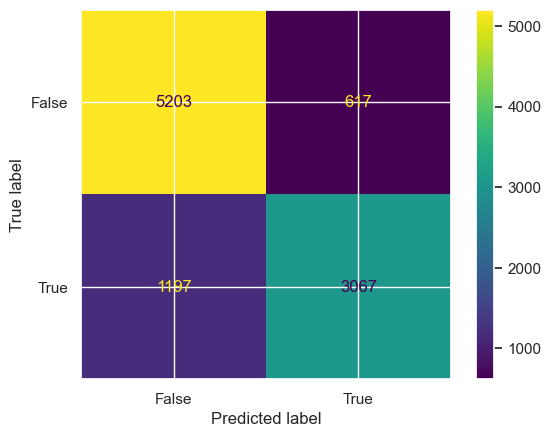

[0 1 1 ... 1 0 1]


In [599]:
from sklearn.metrics import confusion_matrix
# Calculation of predictions
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=2)
# Determining confusion matrix
confusion_matrix1= confusion_matrix(Y_train, predictions)
#Visualizing confusion matrix
plt.figure(figsize=(3,3))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=[False, True])
cm_display.plot()
plt.show()


In [600]:
print(confusion_matrix1)
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

[[5203  617]
 [1197 3067]]
Precision: 0.8325190010857764
Recall: 0.7192776735459663


**Conclusions over training set:**
    
***Precision:*** Precision measures the proportion of true positive predictions out of all positive predictions. 
The relatively low number of false positives (623) compared to true positives (3108) 
indicates that the model has a good precision, meaning it is effective at not 
misclassifying negative instances as positive.

***Recall (Sensitivity):*** Recall measures the proportion of actual positives that were correctly identified.
The model's ability to correctly identify a high number of true positives (3108) relative
to false negatives (1156) suggests a reasonable level of recall.

***Specificity:*** Specificity measures the proportion of actual negatives that were correctly identified. With a high number of true negatives (5197) relative to false positives (623), the model demonstrates a good ability to identify true negatives.


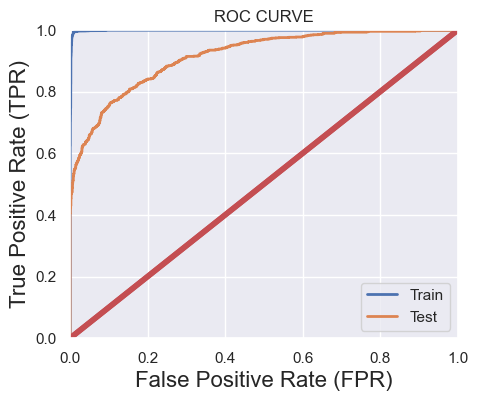

TRAIN ROC-AUC-Score: 0.9989443103937383
TEST ROC-AUC-Score: 0.915908164826167


In [602]:
# getting the probabilities of our predictions
y_scores_train = random_forest.predict_proba(X_train)[:,1]
y_scores_test = random_forest.predict_proba(X_test)[:,1]

# compute true positive rate and false positive rate
false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(Y_train, y_scores_train)
# compute true positive rate and false positive rate
false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(Y_test, y_scores_test)

#Visualizing roc curve
plt.figure(figsize=(5, 4))
plot_roc_curve(false_positive_rate_train, true_positive_rate_train,"Train")
plot_roc_curve(false_positive_rate_test, true_positive_rate_test,"Test")
plt.title("ROC CURVE")
plt.legend()
plt.show()

#Printing score results of the training and test sets
r_a_score = roc_auc_score(Y_train, y_scores_train)
print("TRAIN ROC-AUC-Score:", r_a_score)
r_a_score = roc_auc_score(Y_test, y_scores_test)
print("TEST ROC-AUC-Score:", r_a_score)

**Conclusions:**
    
***Training Set Performance:*** The high ROC-AUC score of 0.9989 on the training set indicates that the model
performs exceptionally well in distinguishing between the positive and negative classes. 
This suggests that the model has a high ability to rank the true positive instances higher than
the true negative instances.

***Test Set Performance:*** The slightly lower ROC-AUC score of 0.9159 on the test set indicates 
that the model's performance is still strong, but there may be a slight drop in its ability to
discriminate between the positive and negative classes compared to the training set.
This is expected as the test set represents unseen data, and the model's generalization to new
instances is reflected in this score.

***Overfitting Consideration:*** The significant difference between the training and test ROC-AUC
scores may indicate a potential for overfitting, where the model may have 
learned the training data too well, leading to a drop in performance on unseen data. 
It's important to further evaluate the model's generalization and consider potential measures to address overfitting.

When too many variables are included in a model as in this case, the risk of overfitting increases. Some of these variables may not have true predictive power and could be noise variables. 

### In summary for the modeling using Random Forest ###

The Random Forest model for this particular case shows robust performance across 
different folds of the data, indicating its reliability and potential for effective generalization to new data.
Key variables such as lead time, country, requests, and temporal features significantly influence
the predictive outcome. The model achieves high scores on both the training and test sets, 
demonstrating its ability to make accurate predictions on unseen data. However, there is a possibility 
of overfitting due to the significant difference in performance between the training and test sets, 
highlighting the need for further evaluation and measures to address this issue.